In [1]:
import os
from PIL import Image

import torch
import numpy as np
import matplotlib.pyplot as plt

import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets, models
from torch.utils.data.sampler import SubsetRandomSampler
from torch import nn
from torch import optim

In [2]:
print(torch.__version__)

1.2.0


In [3]:
data_dir = "dataset/"

In [4]:
# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 32
# percentage of the data used for training, validation and test set
valid_size  = 0.25
test_size   = 0.10
train_size  = 0.75

In [5]:
transform_train = transforms.Compose([
    transforms.Resize(255),
    transforms.CenterCrop(224),
    transforms.RandomHorizontalFlip(), 
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
])

# Validation don't use data augmentation (RandomHorizontalFlip, RandomRotation)
transform_validation_test = transforms.Compose([
    transforms.Resize(255),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Define transforms used for the training and validation sets
data_transforms = [transform_train, transform_validation_test]

# Load the datases with ImageFolder (NOTE: if everything goes wrong this is the problem)
data = datasets.ImageFolder(data_dir, transform=data_transforms[0])

# Obtain training indices that will be used for validation
len_data = len(data)
indices = list(range(len_data))
np.random.shuffle(indices)

split1 = int(np.floor(valid_size * len_data)) # end validation
split2 = int(np.floor((valid_size * len_data) + (test_size * len_data))) # end test

# Get the indexes for each split
valid_idx, test_idx, train_idx = indices[:split1], indices[split1:split2], indices[split2:len_data]

# Define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)
test_sampler = SubsetRandomSampler(test_idx)

# Using the image datasets and the trainforms, define the dataloaders
train_loader = torch.utils.data.DataLoader(data, batch_size=batch_size,
    sampler=train_sampler, num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(data, batch_size=batch_size, 
    sampler=valid_sampler, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(data, batch_size=batch_size, 
    sampler=test_sampler, num_workers=num_workers)

In [6]:
# helper function to un-normalize an image
class UnNormalize(object):
    def __init__(self, mean, std):
        self.mean = mean
        self.std = std

    def __call__(self, tensor):
        for t, m, s in zip(tensor, self.mean, self.std):
            t.mul_(s).add_(m)
        return tensor

# helper function to display an image
def imshow(img):
    img = torch.tensor(img)
    unorm = UnNormalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
    img = unorm(img)
    plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image

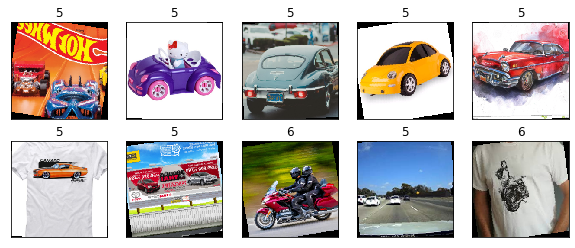

In [29]:
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images, labels = images.numpy(), labels.numpy()

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(10, 4))

for idx in np.arange(10):
    ax = fig.add_subplot(2, 10/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(labels[idx])